In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
filedir='data/analysis_crime_seoul'

In [3]:
filenames=os.listdir(filedir)

In [4]:
filenames

['2000년.csv',
 '2001년.csv',
 '2002년.csv',
 '2003년.csv',
 '2004년.csv',
 '2005년.csv',
 '2006년.csv',
 '2007년.csv',
 '2008년.csv',
 '2009년.csv',
 '2010년.csv',
 '2011년.csv',
 '2012년.csv',
 '2013년.csv',
 '2014년.csv',
 '2015년.csv',
 '2016년.csv',
 '2017년.csv',
 '2018년.csv',
 'modified']

In [122]:
file_list = []
for file in filenames:
    if file.endswith('.csv'):
        file_list.append(file)

In [124]:


file=file_list[-1]

_crime_anal_police = pd.read_csv("{}/{}".format(filedir, file), encoding= 'cp949')
_crime_anal_police.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


In [133]:
file_list[-1]

'2018년.csv'

In [6]:
police_station = _crime_anal_police['구분'].unique()
police_station

array(['중부', '종로', '남대문', '서대문', '혜화', '용산', '성북', '동대문', '마포', '영등포',
       '성동', '동작', '광진', '서부', '강북', '금천', '중랑', '강남', '관악', '강서', '강동',
       '종암', '구로', '서초', '양천', '송파', '노원', '방배', '은평', '도봉', '수서'],
      dtype=object)

In [7]:
crime_name=_crime_anal_police['죄종'].unique()
crime_name

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

In [8]:
crime_class=_crime_anal_police['발생검거'].unique()
crime_class

array(['발생', '검거'], dtype=object)

In [9]:
result_list = []
for p in police_station:
    temp_dict = {
        '구분': p
    }
    for n in crime_name:
        for c in crime_class:
            key = n+c
            con1 = _crime_anal_police['구분'] == p
            con2 = _crime_anal_police['죄종'] == n
            con3 = _crime_anal_police['발생검거'] == c
            
            value = _crime_anal_police[con1 & con2 & con3]['건수'].values[0]
            temp_dict[key] = value
    result_list.append(temp_dict)
result_list

[{'구분': '중부',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 5,
  '강도검거': 7,
  '강간발생': 132,
  '강간검거': 63,
  '절도발생': 1057,
  '절도검거': 415,
  '폭력발생': 1176,
  '폭력검거': 1010},
 {'구분': '종로',
  '살인발생': 5,
  '살인검거': 4,
  '강도발생': 1,
  '강도검거': 0,
  '강간발생': 136,
  '강간검거': 114,
  '절도발생': 744,
  '절도검거': 398,
  '폭력발생': 1131,
  '폭력검거': 993},
 {'구분': '남대문',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 6,
  '강도검거': 4,
  '강간발생': 75,
  '강간검거': 52,
  '절도발생': 798,
  '절도검거': 417,
  '폭력발생': 779,
  '폭력검거': 709},
 {'구분': '서대문',
  '살인발생': 5,
  '살인검거': 4,
  '강도발생': 3,
  '강도검거': 3,
  '강간발생': 206,
  '강간검거': 189,
  '절도발생': 1062,
  '절도검거': 585,
  '폭력발생': 1526,
  '폭력검거': 1235},
 {'구분': '혜화',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 2,
  '강도검거': 2,
  '강간발생': 100,
  '강간검거': 58,
  '절도발생': 739,
  '절도검거': 340,
  '폭력발생': 831,
  '폭력검거': 712},
 {'구분': '용산',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 3,
  '강도검거': 2,
  '강간발생': 331,
  '강간검거': 285,
  '절도발생': 1096,
  '절도검거': 522,
  '폭력발생': 1980,
  '폭력검거': 1733},
 {'구분': '성북',
  '살인발생': 1,
  '살인검거': 1,
  '강도발생': 

In [10]:
_crime_anal_police=pd.DataFrame(result_list)
_crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,중부,1,1,5,7,132,63,1057,415,1176,1010
1,종로,5,4,1,0,136,114,744,398,1131,993
2,남대문,1,1,6,4,75,52,798,417,779,709
3,서대문,5,4,3,3,206,189,1062,585,1526,1235
4,혜화,1,1,2,2,100,58,739,340,831,712


In [11]:
crime_anal_police = pd.DataFrame(result_list)
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,중부,1,1,5,7,132,63,1057,415,1176,1010
1,종로,5,4,1,0,136,114,744,398,1131,993
2,남대문,1,1,6,4,75,52,798,417,779,709
3,서대문,5,4,3,3,206,189,1062,585,1526,1235
4,혜화,1,1,2,2,100,58,739,340,831,712


In [12]:
crime_anal_police['구분'] =  crime_anal_police['구분'].apply(lambda x:"서울"+x+"경찰서")

In [13]:
crime_anal_police

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712
5,서울용산경찰서,1,1,3,2,331,285,1096,522,1980,1733
6,서울성북경찰서,1,1,0,0,125,90,600,298,886,798
7,서울동대문경찰서,2,2,5,4,145,112,1447,930,2081,1920
8,서울마포경찰서,6,6,6,7,473,396,2011,882,2676,2278
9,서울영등포경찰서,17,15,8,6,391,267,2292,1064,3132,2570


In [14]:
from time import sleep
from pprint import pprint
import requests
import random

In [15]:
random.randint(1,3)

3

In [16]:
#instantSearch
station_address=[]#주소
station_lng=[]#경도(x)
station_lat=[]#위도(y)

url = 'https://map.naver.com/v5/api/instantSearch'
params = {
    'lang':'ko',
    'caller': 'pcweb',
    'type':'place',
    'coords':'37.564888490181026,126.96680545806886'
}

for police in crime_anal_police['구분']:
    sleep(random.randint(1,3))
    params['q'] = police
    
    resp = requests.get(url, params)
#     print(resp)
#    pprint(resp.json())
    data = resp.json()
    geo_info = data['poi'][0]
    
    address=geo_info.get('roadAddress')
    
    if not address:
        address=geo_info.get('jibunAddress')
    # station_address.append(geo_info.get('roadAdress', geo_info.get('address'))) 
    station_address.append(address)
    station_lng.append(geo_info.get('x'))
    station_lat.append(geo_info.get('y'))
    


In [17]:
# station_address=[]#주소
# station_lng=[]#경도(x)
# station_lat=[]#위도(y)

# url = 'https://map.naver.com/v5/api/search'
# params = {
#     'caller': 'pcweb',
# }

# for police in crime_anal_police['구분']:
#     sleep(random.randint(1,3))
#     params['query'] = police
#     resp = requests.get(url, params)
# #     print(resp)
# #     pprint(resp.json())
#     data = resp.json()
#     geo_info = data['result']['place']['list'][0]
    
#     address=geo_info.get('roadAdress')
    
#     if not address:
#         address=geo_info.get('address')
#     # station_address.append(geo_info.get('roadAdress', geo_info.get('address'))) 
#     station_address.append(address)
#     station_lng.append(geo_info.get('x'))
#     station_lat.append(geo_info.get('y'))


In [18]:
zip(station_address, station_lng, station_lat)

In [19]:
dict(zip(station_address, station_lng)) #dict의 경우 앞에가 key뒤에가 value

{'서울특별시 중구 수표로 27 중부경찰서': '126.9896139',
 '서울특별시 종로구 율곡로 46 종로경찰서': '126.9849292',
 '서울특별시 중구 남대문로5가 567': '126.9734874',
 '서울특별시 서대문구 통일로 113 서대문경찰서': '126.9667850',
 '서울특별시 종로구 창경궁로 112-16': '126.9989318',
 '서울특별시 용산구 원효로89길 24 용산경찰서': '126.9677732',
 '서울특별시 성북구 보문로 170 서울성북경찰서': '127.0160834',
 '서울특별시 동대문구 약령시로21길 29 동대문경찰서': '127.0457643',
 '서울특별시 마포구 마포대로 183': '126.9539447',
 '서울특별시 영등포구 국회대로 608': '126.9009426',
 '서울특별시 성동구 왕십리광장로 9 성동경찰서': '127.0364909',
 '서울특별시 동작구 노량진로 148 동작경찰서': '126.9428596',
 '서울특별시 광진구 구의동 254-32': '127.0838753',
 '서울특별시 은평구 진흥로 58': '126.9212207',
 '서울특별시 강북구 오패산로 406 서울강북경찰서': '127.0273396',
 '서울특별시 금천구 시흥대로73길 50': '126.8966992',
 '서울특별시 중랑구 신내동 267-1': '127.1045567',
 '서울특별시 강남구 테헤란로114길 11': '127.0671247',
 '서울특별시 관악구 관악로5길 33 관악경찰서': '126.9510663',
 '서울특별시 양천구 화곡로 73 서울프라자': '126.8300924',
 '서울특별시 강동구 성내로 55 강동구의회의사당': '127.1269289',
 '서울특별시 성북구 종암로 135 종암경찰서': '127.0323885',
 '서울특별시 구로구 가마산로 235 구로경찰서': '126.8867298',
 '서울특별시 서초구 반포대로 179 서초경찰서': 

In [20]:
# zip을 하기 우해서는 모두 같은 갯수를 가지고 있어야 한다.
list(zip(station_address, station_lng, station_lat))

[('서울특별시 중구 수표로 27 중부경찰서', '126.9896139', '37.5635144'),
 ('서울특별시 종로구 율곡로 46 종로경찰서', '126.9849292', '37.5755321'),
 ('서울특별시 중구 남대문로5가 567', '126.9734874', '37.5547667'),
 ('서울특별시 서대문구 통일로 113 서대문경찰서', '126.9667850', '37.5649018'),
 ('서울특별시 종로구 창경궁로 112-16', '126.9989318', '37.5718764'),
 ('서울특별시 용산구 원효로89길 24 용산경찰서', '126.9677732', '37.5412134'),
 ('서울특별시 성북구 보문로 170 서울성북경찰서', '127.0160834', '37.5899114'),
 ('서울특별시 동대문구 약령시로21길 29 동대문경찰서', '127.0457643', '37.5851004'),
 ('서울특별시 마포구 마포대로 183', '126.9539447', '37.5510174'),
 ('서울특별시 영등포구 국회대로 608', '126.9009426', '37.5258476'),
 ('서울특별시 성동구 왕십리광장로 9 성동경찰서', '127.0364909', '37.5618368'),
 ('서울특별시 동작구 노량진로 148 동작경찰서', '126.9428596', '37.5131459'),
 ('서울특별시 광진구 구의동 254-32', '127.0838753', '37.5428366'),
 ('서울특별시 은평구 진흥로 58', '126.9212207', '37.6020717'),
 ('서울특별시 강북구 오패산로 406 서울강북경찰서', '127.0273396', '37.6374119'),
 ('서울특별시 금천구 시흥대로73길 50', '126.8966992', '37.4572441'),
 ('서울특별시 중랑구 신내동 267-1', '127.1045567', '37.6187750'),
 ('서울특별시 강남구 테헤란

In [21]:
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712


In [22]:
gu_name=[]
for name in station_address:
    tmp = name.split()
    gu_name.append(tmp[1])
crime_anal_police['구별']=gu_name
crime_anal_police.head()

,구분,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구


In [23]:
crime_anal_police['구별'].value_counts()

강남구     2
양천구     2
종로구     2
은평구     2
성북구     2
서초구     2
중구      2
구로구     1
강북구     1
마포구     1
용산구     1
동작구     1
노원구     1
중랑구     1
광진구     1
동대문구    1
서대문구    1
송파구     1
성동구     1
도봉구     1
관악구     1
강동구     1
금천구     1
영등포구    1
Name: 구별, dtype: int64

In [24]:
crime_anal_police.rename(columns={
    '구분':'관서명'
},inplace=True)

### 수정한 파일 저장

In [25]:
file

'2018년.csv'

In [26]:
import os

In [27]:
if not os.path.exists(filedir+'/modified'):
    os.makedirs(filedir+'/modified')

In [28]:
modified_file="modified/{}".format(file)

In [29]:
crime_anal_police.to_csv("{}/{}".format(filedir,modified_file),sep=',',encoding='utf-8')

In [30]:
df =crime_anal_police

In [31]:
df =crime_anal_police.copy()

In [32]:
df.head()

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구


In [33]:
sample=pd.pivot_table(df,index=['구별'])
sample.loc[sample.index=='중구']

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
중구,57.5,103.5,5.5,5.5,1.0,1.0,416.0,927.5,859.5,977.5


### index여러개 지정-지정순서가  pivot의 영향을 미침

In [34]:
pd.pivot_table(df,index=['구별','관서명'])

강간검거  강간발생  강도검거  강도발생  살인검거  살인발생  절도검거  절도발생  폭력검거  폭력발생
구별   관서명                                                                 
강남구  서울강남경찰서    352   406     8     9     8     5   836  2020  1890  2188
     서울수서경찰서    171   194     2     5     5     5   481   984  1443  1697
강동구  서울강동경찰서    143   170     7     7     3     3   765  1515  1871  2224
강북구  서울강북경찰서    135   188     7     7     6     8   603  1112  1992  2122
관악구  서울관악경찰서    305   352    12    10     9     9  1025  2012  2302  2643
광진구  서울광진경찰서    184   229     1     2     5     7   974  1769  1625  1908
구로구  서울구로경찰서    181   250     9     9     8     8   787  1717  2353  2826
금천구  서울금천경찰서    185   200     6     7     6     6   645  1168  1725  1912
노원구  서울노원경찰서    173   194     5     5     4     5   585  1422  1958  2381
도봉구  서울도봉경찰서    117   113     3     5     1     1   431   781  1124  1349
동대문구 서울동대문경찰서   112   145     4     5     2     2   930  1447  1920  2081
동작구  서울동작경찰서    154   288     7     7     3     3   532  1151  1394  1651
마포구  서울마포경찰서    396   473     7     6     6     6   882  2011  2278  2676
서대문구 서울서대문경찰서   189   206     3     3     4     5   585  1062  1235  1526
서초구  서울방배경찰서     41    63     1     1     0     0   165   369   423   487
     서울서초경찰서    274   407     4     4     5     5   673  1482  1597  1908
성동구  서울성동경찰서    102   126     8     5     2     2   487   999  1188  1325
성북구  서울성북경찰서     90   125     0     0     1     1   298   600   798   886
     서울종암경찰서     50    58     2     1     5     6   337   564   696   801
송파구  서울송파경찰서    254   309     8     6     6     5  1034  2352  2749  3135
양천구  서울강서경찰서    246   269     3     6     9    11   982  1724  2229  2619
     서울양천경찰서    111   120    14     4     3     2   646  1384  1685  2005
영등포구 서울영등포경찰서   267   391     6     8    15    17  1064  2292  2570  3132
용산구  서울용산경찰서    285   331     2     3     1     1   522  1096  1733  1980
은평구  서울서부경찰서     52    58     0     0     4     4   325   505   711   807
     서울은평경찰서    117   130     1     1     4     4   491   773  1158  1308
종로구  서울종로경찰서    114   136     0     1     4     5   398   744   993  1131
     서울혜화경찰서     58   100     2     2     1     1   340   739   712   831
중구   서울남대문경찰서    52    75     4     6     1     1   417   798   709   779
     서울중부경찰서     63   132     7     5     1     1   415  1057  1010  1176
중랑구  서울중랑경찰서    145   174     3     3     5     4   876  1526  2193  2581

### value지정(특정 값만 남기기)

In [35]:
pd.pivot_table(df,index=['구별','관서명'],values=['절도검거','절도발생'])

절도검거  절도발생
구별   관서명                 
강남구  서울강남경찰서    836  2020
     서울수서경찰서    481   984
강동구  서울강동경찰서    765  1515
강북구  서울강북경찰서    603  1112
관악구  서울관악경찰서   1025  2012
광진구  서울광진경찰서    974  1769
구로구  서울구로경찰서    787  1717
금천구  서울금천경찰서    645  1168
노원구  서울노원경찰서    585  1422
도봉구  서울도봉경찰서    431   781
동대문구 서울동대문경찰서   930  1447
동작구  서울동작경찰서    532  1151
마포구  서울마포경찰서    882  2011
서대문구 서울서대문경찰서   585  1062
서초구  서울방배경찰서    165   369
     서울서초경찰서    673  1482
성동구  서울성동경찰서    487   999
성북구  서울성북경찰서    298   600
     서울종암경찰서    337   564
송파구  서울송파경찰서   1034  2352
양천구  서울강서경찰서    982  1724
     서울양천경찰서    646  1384
영등포구 서울영등포경찰서  1064  2292
용산구  서울용산경찰서    522  1096
은평구  서울서부경찰서    325   505
     서울은평경찰서    491   773
종로구  서울종로경찰서    398   744
     서울혜화경찰서    340   739
중구   서울남대문경찰서   417   798
     서울중부경찰서    415  1057
중랑구  서울중랑경찰서    876  1526

### aggfunc지정하기

In [36]:
pd.pivot_table(df,index=['구별'],values=['절도검거','절도발생'],aggfunc=np.max)
#  강남구 ->(강남경찰서, 수서경찰서 max값)

#위와 아래는 동일한 작동을 하지만 내부적 연산 속도에 차이 발생.(numpy 속도 빠름)
# pd.pivot_table(df,index=['구별','관서명'],values=['절도검거','절도발생'],aggfunc=max)


,절도검거,절도발생
구별,,
강남구,836,2020
강동구,765,1515
강북구,603,1112
관악구,1025,2012
광진구,974,1769
구로구,787,1717
금천구,645,1168
노원구,585,1422
도봉구,431,781


### aggfunc 여러개 지정하기

In [37]:
# 강남구 ->(강남경찰서,수서경찰서 최댓값 및 평균 최솟값)
#MunltiIndex columns
pd.pivot_table(df,index=['구별'],values=['절도검거','절도발생'],aggfunc=[np.max,np.mean,np.min])

amax          mean          amin      
      절도검거  절도발생    절도검거    절도발생  절도검거  절도발생
구별                                          
강남구    836  2020   658.5  1502.0   481   984
강동구    765  1515   765.0  1515.0   765  1515
강북구    603  1112   603.0  1112.0   603  1112
관악구   1025  2012  1025.0  2012.0  1025  2012
광진구    974  1769   974.0  1769.0   974  1769
구로구    787  1717   787.0  1717.0   787  1717
금천구    645  1168   645.0  1168.0   645  1168
노원구    585  1422   585.0  1422.0   585  1422
도봉구    431   781   431.0   781.0   431   781
동대문구   930  1447   930.0  1447.0   930  1447
동작구    532  1151   532.0  1151.0   532  1151
마포구    882  2011   882.0  2011.0   882  2011
서대문구   585  1062   585.0  1062.0   585  1062
서초구    673  1482   419.0   925.5   165   369
성동구    487   999   487.0   999.0   487   999
성북구    337   600   317.5   582.0   298   564
송파구   1034  2352  1034.0  2352.0  1034  2352
양천구    982  1724   814.0  1554.0   646  1384
영등포구  1064  2292  1064.0  2292.0  1064  2292
용산구    522  1096   522.0  1096.0   522  1096
은평구    491   773   408.0   639.0   325   505
종로구    398   744   369.0   741.5   340   739
중구     417  1057   416.0   927.5   415   798
중랑구    876  1526   876.0  1526.0   876  1526

### pivot_table 최종(+NA값 처리/margin-총계)

In [38]:
pd.pivot_table(df,index=['구별','관서명'],values=['절도검거','절도발생'],aggfunc=[np.max,np.mean,np.min],
               fill_value=0)

amax        mean        amin      
               절도검거  절도발생  절도검거  절도발생  절도검거  절도발생
구별   관서명                                         
강남구  서울강남경찰서    836  2020   836  2020   836  2020
     서울수서경찰서    481   984   481   984   481   984
강동구  서울강동경찰서    765  1515   765  1515   765  1515
강북구  서울강북경찰서    603  1112   603  1112   603  1112
관악구  서울관악경찰서   1025  2012  1025  2012  1025  2012
광진구  서울광진경찰서    974  1769   974  1769   974  1769
구로구  서울구로경찰서    787  1717   787  1717   787  1717
금천구  서울금천경찰서    645  1168   645  1168   645  1168
노원구  서울노원경찰서    585  1422   585  1422   585  1422
도봉구  서울도봉경찰서    431   781   431   781   431   781
동대문구 서울동대문경찰서   930  1447   930  1447   930  1447
동작구  서울동작경찰서    532  1151   532  1151   532  1151
마포구  서울마포경찰서    882  2011   882  2011   882  2011
서대문구 서울서대문경찰서   585  1062   585  1062   585  1062
서초구  서울방배경찰서    165   369   165   369   165   369
     서울서초경찰서    673  1482   673  1482   673  1482
성동구  서울성동경찰서    487   999   487   999   487   999
성북구  서울성북경찰서    298   600   298   600   298   600
     서울종암경찰서    337   564   337   564   337   564
송파구  서울송파경찰서   1034  2352  1034  2352  1034  2352
양천구  서울강서경찰서    982  1724   982  1724   982  1724
     서울양천경찰서    646  1384   646  1384   646  1384
영등포구 서울영등포경찰서  1064  2292  1064  2292  1064  2292
용산구  서울용산경찰서    522  1096   522  1096   522  1096
은평구  서울서부경찰서    325   505   325   505   325   505
     서울은평경찰서    491   773   491   773   491   773
종로구  서울종로경찰서    398   744   398   744   398   744
     서울혜화경찰서    340   739   340   739   340   739
중구   서울남대문경찰서   417   798   417   798   417   798
     서울중부경찰서    415  1057   415  1057   415  1057
중랑구  서울중랑경찰서    876  1526   876  1526   876  1526

In [39]:
pd.pivot_table?

In [40]:
df.tail()

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
26,서울노원경찰서,5,4,5,5,194,173,1422,585,2381,1958,노원구
27,서울방배경찰서,0,0,1,1,63,41,369,165,487,423,서초구
28,서울은평경찰서,4,4,1,1,130,117,773,491,1308,1158,은평구
29,서울도봉경찰서,1,1,5,3,113,117,781,431,1349,1124,도봉구
30,서울수서경찰서,5,5,5,2,194,171,984,481,1697,1443,강남구


In [41]:
# 강남구->(강남경찰서, 수서경찰서 합계 및 평균)
pd.pivot_table (df,
               index=['구별'],
               values=['절도검거','절도발생'],
               aggfunc=[np.max,np.mean,np.min],
               fill_value=0,
               margins=True,
               margins_name="총계")

amax               mean               amin      
      절도검거  절도발생         절도검거         절도발생  절도검거  절도발생
구별                                                    
강남구    836  2020   658.500000  1502.000000   481   984
강동구    765  1515   765.000000  1515.000000   765  1515
강북구    603  1112   603.000000  1112.000000   603  1112
관악구   1025  2012  1025.000000  2012.000000  1025  2012
광진구    974  1769   974.000000  1769.000000   974  1769
구로구    787  1717   787.000000  1717.000000   787  1717
금천구    645  1168   645.000000  1168.000000   645  1168
노원구    585  1422   585.000000  1422.000000   585  1422
도봉구    431   781   431.000000   781.000000   431   781
동대문구   930  1447   930.000000  1447.000000   930  1447
동작구    532  1151   532.000000  1151.000000   532  1151
마포구    882  2011   882.000000  2011.000000   882  2011
서대문구   585  1062   585.000000  1062.000000   585  1062
서초구    673  1482   419.000000   925.500000   165   369
성동구    487   999   487.000000   999.000000   487   999
성북구    337   600   317.500000   582.000000   298   564
송파구   1034  2352  1034.000000  2352.000000  1034  2352
양천구    982  1724   814.000000  1554.000000   646  1384
영등포구  1064  2292  1064.000000  2292.000000  1064  2292
용산구    522  1096   522.000000  1096.000000   522  1096
은평구    491   773   408.000000   639.000000   325   505
종로구    398   744   369.000000   741.500000   340   739
중구     417  1057   416.000000   927.500000   415   798
중랑구    876  1526   876.000000  1526.000000   876  1526
총계    1064  2352   630.032258  1263.709677   165   369

## 예제1.pivot_table을 이용해서 crime_anal_police의 데이터의 구별로 데이터를 정리하고 합계를 표시하시오. 그결과 crime_anal로 저장하시오.

In [42]:
pd.pivot_table?

In [43]:
crime_anal_police.loc[crime_anal_police['구별']=='강남구']

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
17,서울강남경찰서,5,8,9,8,406,352,2020,836,2188,1890,강남구
30,서울수서경찰서,5,5,5,2,194,171,984,481,1697,1443,강남구


In [44]:
crime_anal = pd.pivot_table(crime_anal_police,index=['구별'],aggfunc=np.sum)
crime_anal.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
관악구,305,352,12,10,9,9,1025,2012,2302,2643
광진구,184,229,1,2,5,7,974,1769,1625,1908


## 예제2. crime anal의 각 범죄의 검거거와 발생을 가지고 각각[<범죄>검거율]을 입력하시오. 단. 100이 넘어가면 100으로 변경하시오. 그후 기존[<범죄>검거율]데이터는 삭제하시오.

In [45]:
crime_name_list=['강간','강도','살인','절도','폭력']

for crime_name in crime_name_list:
    #검거율 계산
    temp_series=(crime_anal.loc[:, crime_name+"검거"]/ crime_anal.loc[:,crime_name+"발생"])*100
    temp_series[temp_series>100]=100
    
    #검거율 df에 추가
    crime_anal[crime_name+"검거율"]=temp_series
    
    #검거 데이터 삭제
    crime_anal.drop(crime_name+"검거",axis=1, inplace=True)
    
    #아래도 가능
    #del crime_anal[crime_name+"검거"]

## 예제3.[<범죄>발생]columns의 "발생"이라는 단어를 제거하시오(절도 발생->절도)

In [46]:
[i+"발생" for i in crime_name_list]

['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

In [47]:
[i+"발생" for i in crime_name_list],crime_name_list

(['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생'], ['강간', '강도', '살인', '절도', '폭력'])

In [48]:
zip([i+"발생" for i in crime_name_list],crime_name_list)

In [49]:
dict(zip([i+"발생" for i in crime_name_list],crime_name_list))

{'강간발생': '강간', '강도발생': '강도', '살인발생': '살인', '절도발생': '절도', '폭력발생': '폭력'}

In [50]:
column_names=dict(zip([i+"발생" for i in crime_name_list],crime_name_list))
column_names

{'강간발생': '강간', '강도발생': '강도', '살인발생': '살인', '절도발생': '절도', '폭력발생': '폭력'}

In [51]:
crime_anal.rename(columns=column_names,inplace=True)
crime_anal

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,229,2,7,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715
구로구,250,9,8,1717,2826,72.400000,100.000000,100.000000,45.835760,83.262562
금천구,200,7,6,1168,1912,92.500000,85.714286,100.000000,55.222603,90.219665
노원구,194,5,5,1422,2381,89.175258,100.000000,80.000000,41.139241,82.234355
도봉구,113,5,1,781,1349,100.000000,60.000000,100.000000,55.185659,83.320979


#  데이터 분포도 보기

In [52]:
crime_anal.describe()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,267.166667,5.958333,5.958333,1632.291667,2336.458333,80.202129,89.811508,94.000799,50.676009,86.270528
std,124.101875,3.263489,3.804793,602.553153,777.722203,11.414771,15.984097,9.456987,6.190770,3.209737
min,113.000000,1.000000,1.000000,781.000000,1325.000000,53.472222,50.000000,71.428571,41.139241,80.930537
25%,186.750000,3.000000,3.000000,1160.750000,1911.000000,72.761017,78.750000,87.605042,45.695026,84.288709
50%,218.000000,5.500000,5.500000,1499.000000,2118.500000,82.766990,100.000000,100.000000,50.129521,85.479610
75%,336.250000,7.250000,8.000000,1894.000000,2651.250000,87.668814,100.000000,100.000000,55.065703,88.038490
max,600.000000,14.000000,17.000000,3108.000000,4624.000000,100.000000,100.000000,100.000000,64.270905,93.873704


# 2-7 데이터 표현을 위해 다듬기

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
col = ['강간','강도','살인','절도','폭력']

In [55]:
x = crime_anal[col].values
min_max_scaler=MinMaxScaler()

#변환기는 fit 과 transform 함수 내장. (합친게 fit_transform)
#fit은 변환할 값 저장
#transform은 값 변환
x_scaled=min_max_scaler.fit_transform(x.astype(float))

#오리지널 데이터,스케일된 데이터
x,x_scaled

(array([[ 600,   14,   10, 3004, 3885],
        [ 170,    7,    3, 1515, 2224],
        [ 188,    7,    8, 1112, 2122],
        [ 352,   10,    9, 2012, 2643],
        [ 229,    2,    7, 1769, 1908],
        [ 250,    9,    8, 1717, 2826],
        [ 200,    7,    6, 1168, 1912],
        [ 194,    5,    5, 1422, 2381],
        [ 113,    5,    1,  781, 1349],
        [ 145,    5,    2, 1447, 2081],
        [ 288,    7,    3, 1151, 1651],
        [ 473,    6,    6, 2011, 2676],
        [ 206,    3,    5, 1062, 1526],
        [ 470,    5,    5, 1851, 2395],
        [ 126,    5,    2,  999, 1325],
        [ 183,    1,    7, 1164, 1687],
        [ 309,    6,    5, 2352, 3135],
        [ 389,   10,   13, 3108, 4624],
        [ 391,    8,   17, 2292, 3132],
        [ 331,    3,    1, 1096, 1980],
        [ 188,    1,    8, 1278, 2115],
        [ 236,    3,    6, 1483, 1962],
        [ 207,   11,    2, 1855, 1955],
        [ 174,    3,    4, 1526, 2581]], dtype=int64),
 array([[1.        , 1.  

In [56]:
#정규화된 anal_norm data
crime_anal_norm=pd.DataFrame(x_scaled,columns=col,index=crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993
강동구,0.117043,0.461538,0.1250,0.315428,0.272507
강북구,0.154004,0.461538,0.4375,0.142243,0.241588
관악구,0.490760,0.692308,0.5000,0.529007,0.399515
광진구,0.238193,0.076923,0.3750,0.424581,0.176720
구로구,0.281314,0.615385,0.4375,0.402235,0.454986
금천구,0.178645,0.461538,0.3125,0.166309,0.177933
노원구,0.166324,0.307692,0.2500,0.275462,0.320097
도봉구,0.000000,0.307692,0.0000,0.000000,0.007275


In [57]:
col2=[i+"검거율" for i in col]
crime_anal_norm[col2]=crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715


In [58]:
result_CCTV=pd.read_csv("data/CCTV_result.csv",encoding='utf-8',index_col='구별')

In [59]:
result_CCTV.head()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,,,,,
강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,80.970537,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
강동구,1879,303.0,387.0,134.0,59,144,194,273,385,112.797282,430522,426219,4303,61710,0.999484,14.333762,0.436447,425.220292
강북구,1265,243.0,88.0,141.0,74,145,254,1,319,131.684982,317875,314090,3785,59808,1.190720,18.814943,0.397955,716.387319
강서구,1617,219.0,155.0,118.0,230,187,190,264,254,123.961219,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997
관악구,3985,430.0,56.0,419.0,487,609,619,694,671,186.278736,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045


## 연습문제1-crime_anal_norm 데이터프레임에 인구수와 cctv의 소계를 추가하시오

In [60]:
result_CCTV

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,,,,,
강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,80.970537,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
강동구,1879,303.0,387.0,134.0,59,144,194,273,385,112.797282,430522,426219,4303,61710,0.999484,14.333762,0.436447,425.220292
강북구,1265,243.0,88.0,141.0,74,145,254,1,319,131.684982,317875,314090,3785,59808,1.190720,18.814943,0.397955,716.387319
강서구,1617,219.0,155.0,118.0,230,187,190,264,254,123.961219,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997
관악구,3985,430.0,56.0,419.0,487,609,619,694,671,186.278736,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045
광진구,1581,470.0,42.0,83.0,87,64,21,468,346,131.818182,368337,352692,15645,47347,4.247469,12.854261,0.429226,545.005440
구로구,3227,852.0,219.0,349.0,187,268,326,540,486,100.808961,439850,406748,33102,64952,7.525747,14.766852,0.733659,896.046764
금천구,1634,27.0,17.0,242.0,101,382,136,199,530,322.222222,252868,233371,19497,37191,7.710347,14.707674,0.646187,161.084950
노원구,1906,481.0,117.0,203.0,80,461,298,110,156,116.345062,539829,535282,4547,79968,0.842304,14.813580,0.353075,711.481219


In [61]:
crime_anal_norm[['인구수','CCTV']]=result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,549043,5221
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,430522,1879
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,317875,1265
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,519953,3985
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,368337,1581


In [62]:
temp = crime_anal_norm.drop(["인구수","CCTV"], axis=1).copy()

In [63]:
temp2 = result_CCTV.copy()

In [65]:
temp2.loc['안양시']=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

In [66]:
temp2[['인구수','소계']]=temp[['인구수','CCTV']]


KeyError: "None of [Index(['인구수', 'CCTV'], dtype='object')] are in the [columns]"

In [67]:
temp2

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,,,,,
강남구,5221,1944,195,316,430,546,765,577,448,80.9705,549043,544028,5015,70029,0.913408,12.7547,0.950927,2577.11
강동구,1879,303,387,134,59,144,194,273,385,112.797,430522,426219,4303,61710,0.999484,14.3338,0.436447,425.22
강북구,1265,243,88,141,74,145,254,1,319,131.685,317875,314090,3785,59808,1.19072,18.8149,0.397955,716.387
강서구,1617,219,155,118,230,187,190,264,254,123.961,600240,593708,6532,82937,1.08823,13.8173,0.269392,1173.61
관악구,3985,430,56,419,487,609,619,694,671,186.279,519953,502117,17836,74518,3.43031,14.3317,0.766415,1424.48
광진구,1581,470,42,83,87,64,21,468,346,131.818,368337,352692,15645,47347,4.24747,12.8543,0.429226,545.005
구로구,3227,852,219,349,187,268,326,540,486,100.809,439850,406748,33102,64952,7.52575,14.7669,0.733659,896.047
금천구,1634,27,17,242,101,382,136,199,530,322.222,252868,233371,19497,37191,7.71035,14.7077,0.646187,161.085
노원구,1906,481,117,203,80,461,298,110,156,116.345,539829,535282,4547,79968,0.842304,14.8136,0.353075,711.481


## 연습문제 2-범죄 발생건수의 합을, '범죄'라는 column으로 두어 저장하고, 범죄검서건수의 합을 "검거"라는  column으로 두고 저장하라.

In [68]:
col2

['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

In [69]:
col3=['강간','강도','살인','절도','폭력']

crime_anal_norm['범죄']=np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm['검거']=np.sum(crime_anal_norm[col2],axis=1)

crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,549043,5221,4.293800,388.228288
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,430522,1879,1.291516,418.740394
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,317875,1265,1.436874,394.908833
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,519953,3985,2.611590,424.690056
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,368337,1581,1.291417,342.004987


In [70]:
# for col3 in col:
#     crime_anal_norm.drop(col3, axis=1,inplace=True)
#     crime_anal_norm.drop(col3+"검거율", axis=1,inplace=True)

In [71]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.5625,0.955307,0.775993,87.166667,71.428571,100.000000,43.841545,85.791506,549043,5221,4.293800,388.228288
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,430522,1879,1.291516,418.740394
강북구,0.154004,0.461538,0.4375,0.142243,0.241588,71.808511,100.000000,75.000000,54.226619,93.873704,317875,1265,1.436874,394.908833
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,519953,3985,2.611590,424.690056
광진구,0.238193,0.076923,0.3750,0.424581,0.176720,80.349345,50.000000,71.428571,55.059356,85.167715,368337,1581,1.291417,342.004987


## 좀더 편리한 시각화 도구 Seaborn

In [72]:
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline

In [74]:
import seaborn as sns


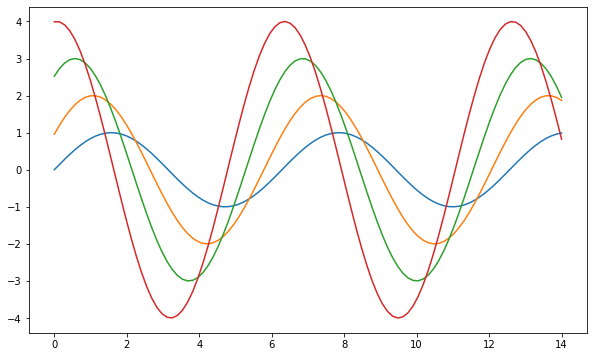

In [75]:
x=np.linspace(0,14,100)
y1=np.sin(x)
y2=2*np.sin(x+0.5)
y3=3*np.sin(x+1.0)
y4=4*np.sin(x+1.5)

plt.figure(figsize=(10,6))
plt.plot(x,y1,x,y2,x,y3,x,y4)

In [76]:
sns.set_style("whitegrid")
%matplotlib inline

In [77]:
tips=sns.load_dataset("tips")

### hue라는 인자로 구분하기

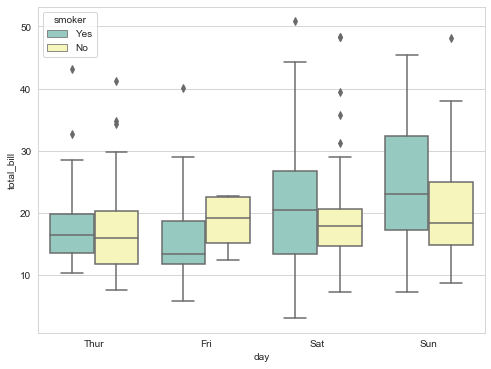

In [78]:
plt.figure(figsize=(8,6))

sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker',palette='Set3')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


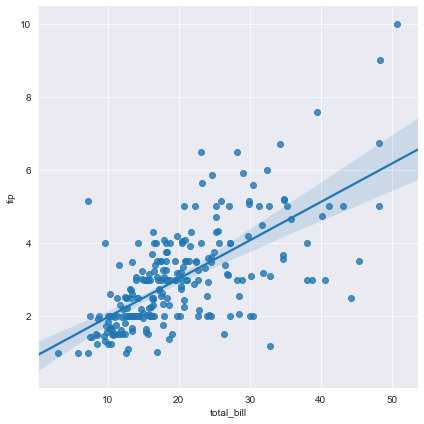

In [79]:
sns.set_style("darkgrid")
sns.lmplot(x='total_bill',y='tip',data=tips,size=6)
plt.show()

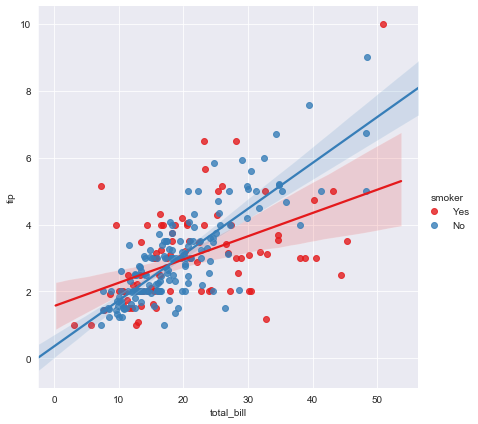

In [80]:
sns.lmplot(x='total_bill',y='tip',data=tips,size=6,hue="smoker",palette="Set1")

## 비행기데이터 p101

In [81]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [82]:
flights=flights.pivot("month","year","passengers")
flight.head()

NameError: name 'flight' is not defined

## seaborn heatmap-데이터 경향 파악

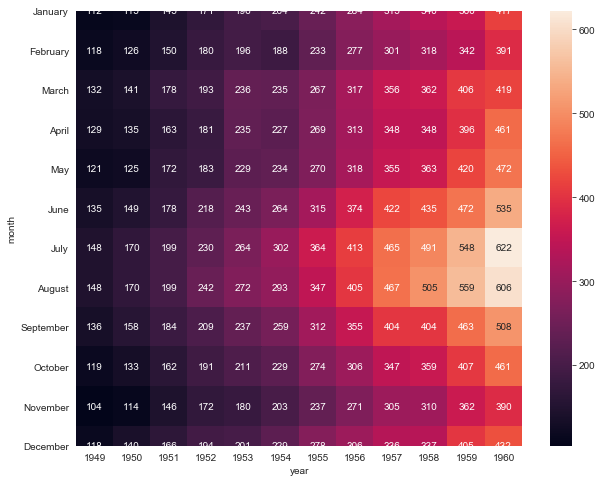

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True,fmt='d')

## lris 데이터p102

In [84]:
sns.set(style='ticks')
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairPlot그리기 - hue파라미터로 구분하기

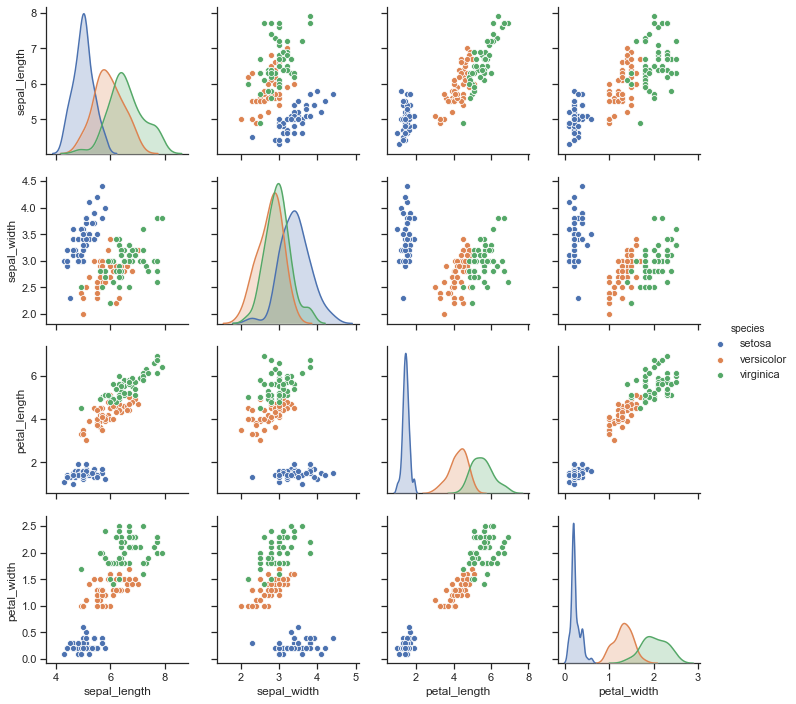

In [85]:
sns.pairplot(iris,hue="species")

In [86]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


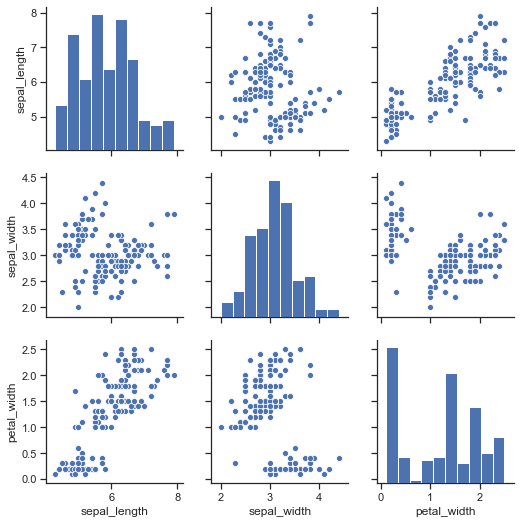

In [87]:
sns.pairplot(iris,vars=['sepal_length','sepal_width','petal_width'])

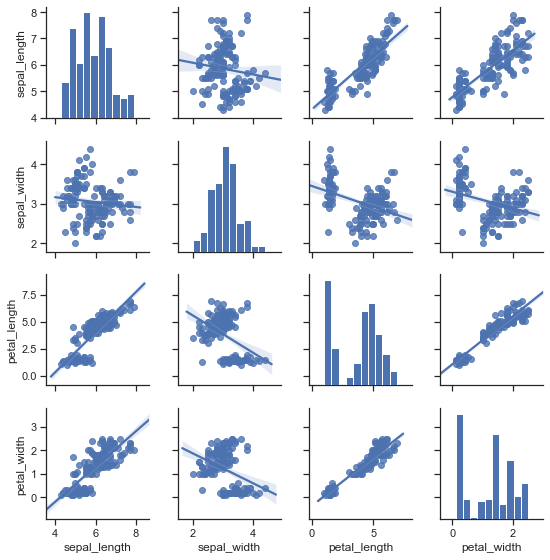

In [88]:
# regression함께 그리기
sns.pairplot(iris,kind='reg',height=2)

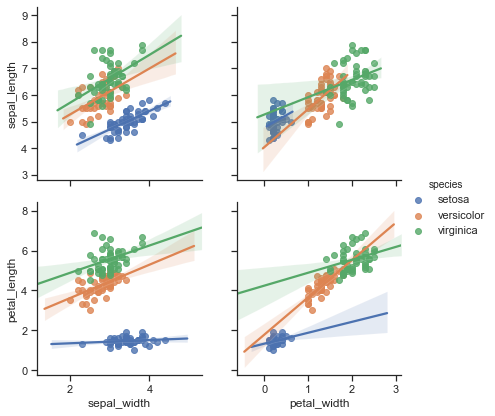

In [89]:
sns.pairplot(iris,
             kind='reg',
             x_vars=['sepal_width','petal_width'],
             y_vars=['sepal_length','petal_length'],
             hue='species',
             height=3)


# 2-8 범죄 데이터 시각화 하기

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
#한글화 하기
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin' : #mac
    font_name ='AppleGothic'
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
else:
    print("지원하지 않음")
rc('font',family=font_name)

# 연습문제 1. crime_anal_norm을 [강도,살인,폭력]에 대한 상관관계를 pairplot을 이용해 분석하시오.regression그래프와 함께 그리시오

In [92]:
crime_anal_norm.var()

강간       6.493798e-02
강도       6.301990e-02
살인       5.654863e-02
절도       6.704987e-02
폭력       5.557563e-02
강간검거율    1.302970e+02
강도검거율    2.554914e+02
살인검거율    8.943461e+01
절도검거율    3.832563e+01
폭력검거율    1.030241e+01
인구수      1.530954e+10
CCTV     9.605977e+05
범죄       1.074848e+00
검거       5.545303e+02
dtype: float64

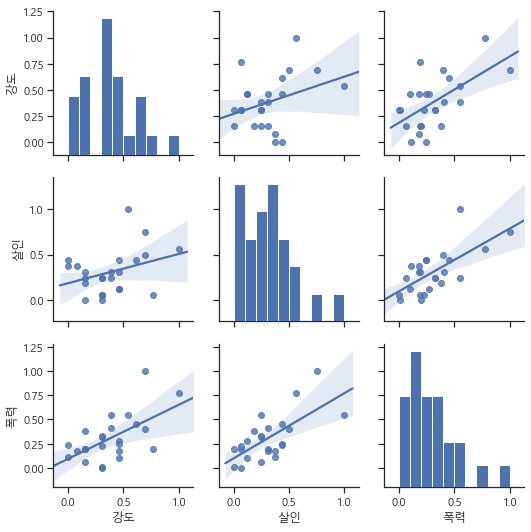

In [93]:
sns.pairplot(crime_anal_norm,vars=['강도','살인','폭력'],kind='reg')

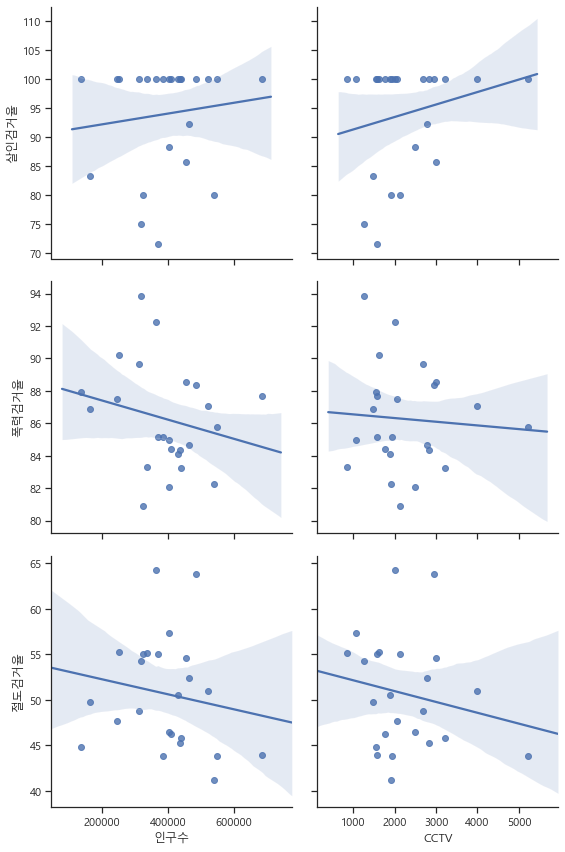

In [100]:
sns.pairplot(crime_anal_norm,
             x_vars=['인구수','CCTV'],
             y_vars=['살인검거율','폭력검거율','절도검거율'],
             kind='reg',
             height=4)

In [106]:
#검거율의 합계를 100으로 한정 짓기.-> 정규화 일종
tmp_max=crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거']/tmp_max*100

#정렬
crime_anal_norm_sort=crime_anal_norm.sort_values(by="검거",ascending=False)


In [110]:
target_col2=col2
crime_anal_norm_sort=crime_anal_norm.sort_values(by="검거",ascending=False)

Text(0.5, 1, '범죄 검거 비율(정규화된 검거의 합)')

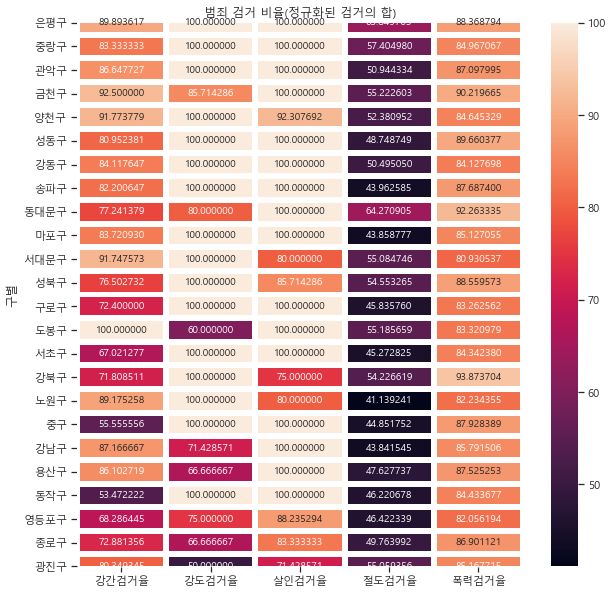

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col2],annot=True,fmt='f',linewidths=5)
plt.title("범죄 검거 비율(정규화된 검거의 합)")

In [112]:
crime_anal_norm_sort

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
은평구,0.154004,0.000000,0.4375,0.213580,0.239467,89.893617,100.000000,100.000000,63.849765,88.368794,486159,2962,1.044550,100.000000
중랑구,0.125257,0.153846,0.1875,0.320155,0.380721,83.333333,100.000000,100.000000,57.404980,84.967067,403776,1068,1.167479,96.288997
관악구,0.490760,0.692308,0.5000,0.529007,0.399515,86.647727,100.000000,100.000000,50.944334,87.097995,519953,3985,2.611590,96.059344
금천구,0.178645,0.461538,0.3125,0.166309,0.177933,92.500000,85.714286,100.000000,55.222603,90.219665,252868,1634,1.296924,95.825579
양천구,0.566735,0.692308,0.7500,1.000000,1.000000,91.773779,100.000000,92.307692,52.380952,84.645329,463931,2775,4.009043,95.249074
성동구,0.026694,0.307692,0.0625,0.093683,0.000000,80.952381,100.000000,100.000000,48.748749,89.660377,311290,2679,0.490569,94.854096
강동구,0.117043,0.461538,0.1250,0.315428,0.272507,84.117647,100.000000,100.000000,50.495050,84.127698,430522,1879,1.291516,94.713608
송파구,0.402464,0.384615,0.2500,0.675118,0.548651,82.200647,100.000000,100.000000,43.962585,87.687400,684338,1586,2.260849,93.607608
동대문구,0.065708,0.307692,0.0625,0.286205,0.229160,77.241379,80.000000,100.000000,64.270905,92.263335,363779,2003,0.951266,93.590641


In [115]:
target_col=col.copy()+['범죄']
target_col                    

['강간', '강도', '살인', '절도', '폭력', '범죄']

In [120]:
crime_anal_norm['범죄']=crime_anal_norm['범죄']/5 #5개를 더해 만들었으니 스케일링

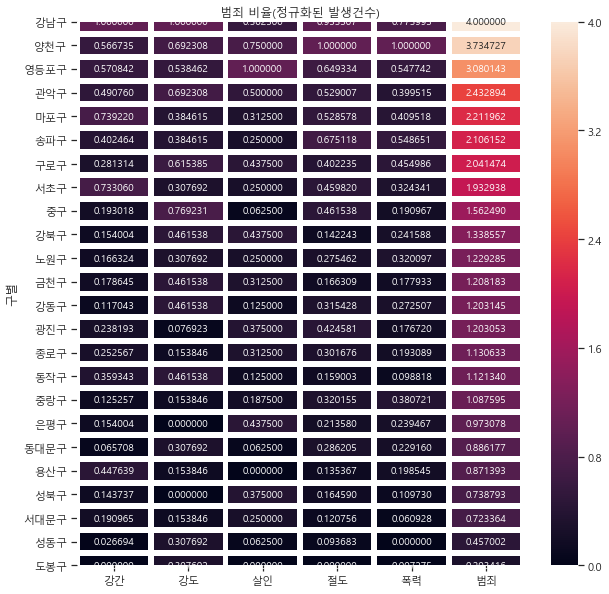

In [121]:
#검거율의 합계를 100으로 한정 짓기.-> 정규화 일종

crime_anal_norm_sort=crime_anal_norm.sort_values(by="범죄",ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(crime_anal_norm_sort[target_col],annot=True,fmt='f',linewidths=5)
plt.title("범죄 비율(정규화된 발생건수)")
plt.show()

## 2-9지도 시각화 도구 Folium

In [134]:
import folium

ModuleNotFoundError: No module named 'folium'

In [138]:
try:
    import folium
except ModuleNotFoundError:
    #!를 붙여주면 cmd창에서 pip install folium을 해준 것과 같다.
    !pip install folium
    import folium

In [145]:
map_osm = folium.Map(location=[45.5236,-122.6750], zoom_start=10, tiles="Stamen Toner")
map_osm

In [172]:
map2 = folium.Map(location=[37.5502,126.982], zoom_start=13, tiles="Stamen Toner")
folium.Marker([37.5572, 126.902],popup='The Waterfront').add_to(map2)

folium.Circle([37.5522,126.932], radius=70, popup='Laurelfurst Park').add_to(map2)
folium.CircleMarker([37.5402,126.882],radius=40, popup='Laurelfurst Park',color="#3186cc",
                    fill_color="#3186cc").add_to(map2)
map2

In [173]:
import folium
import pandas as pd
state_unemployment='./data/02. folium_US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [174]:
state_geo='./data/02. folium_us-states.json'

In [175]:
import json
with open(state_geo,'r') as f:
    data=f.read()

In [176]:
data

'{"type":"FeatureCollection","features":[\n{"type":"Feature","id":"AL","properties":{"name":"Alabama"},"geometry":{"type":"Polygon","coordinates":[[[-87.359296,35.00118],[-85.606675,34.984749],[-85.431413,34.124869],[-85.184951,32.859696],[-85.069935,32.580372],[-84.960397,32.421541],[-85.004212,32.322956],[-84.889196,32.262709],[-85.058981,32.13674],[-85.053504,32.01077],[-85.141136,31.840985],[-85.042551,31.539753],[-85.113751,31.27686],[-85.004212,31.003013],[-85.497137,30.997536],[-87.600282,30.997536],[-87.633143,30.86609],[-87.408589,30.674397],[-87.446927,30.510088],[-87.37025,30.427934],[-87.518128,30.280057],[-87.655051,30.247195],[-87.90699,30.411504],[-87.934375,30.657966],[-88.011052,30.685351],[-88.10416,30.499135],[-88.137022,30.318396],[-88.394438,30.367688],[-88.471115,31.895754],[-88.241084,33.796253],[-88.098683,34.891641],[-88.202745,34.995703],[-87.359296,35.00118]]]}},\n{"type":"Feature","id":"AK","properties":{"name":"Alaska"},"geometry":{"type":"MultiPolygon","co

In [177]:
d=json.loads(data)
d

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

###  choropleth

In [157]:
map = folium.Map(location=[40,-98],zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_data,
              columns=['State','Unemployment'],
              key_on='feaure.id',
              fill_color='YlGn',
              legend_name='Unemployment Rate (%)')

AttributeError: 'NoneType' object has no attribute 'get'

In [158]:
crime_anal_raw = crime_anal_police.copy()

In [159]:
crime_anal_raw.head()

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구


In [162]:
#서별 검거율, 구별 범죄발생율을 구한뒤 데이터 두개를 map에 중첩 표현
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col=['살인검거','강도검거','강간검거','절도검거','폭력검거']
tmp = crime_anal_raw[col]/crime_anal_raw[col].max()

crime_anal_raw['검거'] = np.sum(tmp,axis=1)
crime_anal_raw.head()

,관서명,살인발생,살인검거,강도발생,강도검거,강간발생,강간검거,절도발생,절도검거,폭력발생,폭력검거,구별,lat,lng,검거
0,서울중부경찰서,1,1,5,7,132,63,1057,415,1176,1010,중구,37.5635144,126.9896139,1.483201
1,서울종로경찰서,5,4,1,0,136,114,744,398,1131,993,종로구,37.5755321,126.9849292,1.289828
2,서울남대문경찰서,1,1,6,4,75,52,798,417,779,709,중구,37.5547667,126.9734874,1.133523
3,서울서대문경찰서,5,4,3,3,206,189,1062,585,1526,1235,서대문구,37.5649018,126.9667850,1.957291
4,서울혜화경찰서,1,1,2,2,100,58,739,340,831,712,종로구,37.5718764,126.9989318,0.934541


In [164]:
map = folium.Map(location=[37.5502,126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n],
                   crime_anal_raw['lng'][n],
                   popup
                   ])
map

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D10579288>,
      dtype=object)

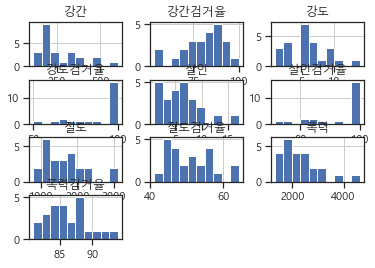

In [165]:
crime_anal.hist()

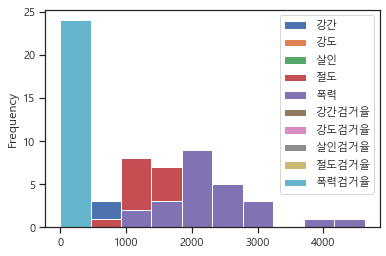

In [168]:
crime_anal.plot.hist()